Importing the Dependencies

In [3]:
import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split   
from sklearn.linear_model import LinearRegression  
from sklearn import metrics 

Data Collection & Analysis

In [4]:
import pandas as pd

insurance_dataset = pd.read_csv('C:\\Users\\pranj\\OneDrive\\Desktop\\Projects\\insurance.csv')


In [5]:
# first 5 rows of the dataframe it is in dollars
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,31,female,25.74,0,no,southeast,3756.6216
1,46,female,33.44,1,no,southeast,8240.5896
2,19,female,27.90,0,yes,southwest,16884.9240
3,18,male,33.77,1,no,southeast,1725.5523
4,28,male,33.00,3,no,southeast,4449.4620


In [6]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [7]:
# getting some informations about the dataset  charges is target others are feature and those 3 are categorical features
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [8]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [9]:
# statistical Measures of the dataset   count is number of values percentile not percentage so 25 percentage values are less thasn 27
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.421626
std,14.049960,6.098187,1.205493,12110.011733
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


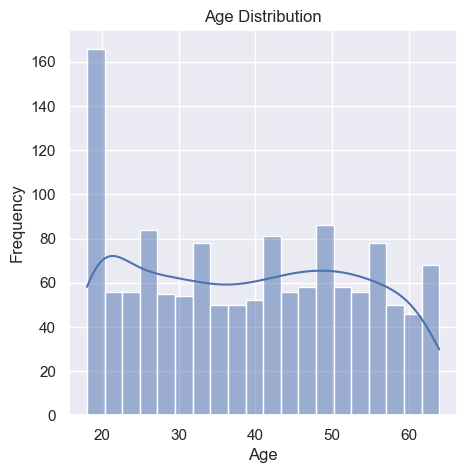

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()  # Enables grid styling for better visualization
plt.figure(figsize=(5, 5))  # Set figure size

# Use histplot for distribution (with KDE curve)
sns.histplot(insurance_dataset['age'], kde=True, bins=20)  

plt.title('Age Distribution')  # Add title
plt.xlabel('Age')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.show()


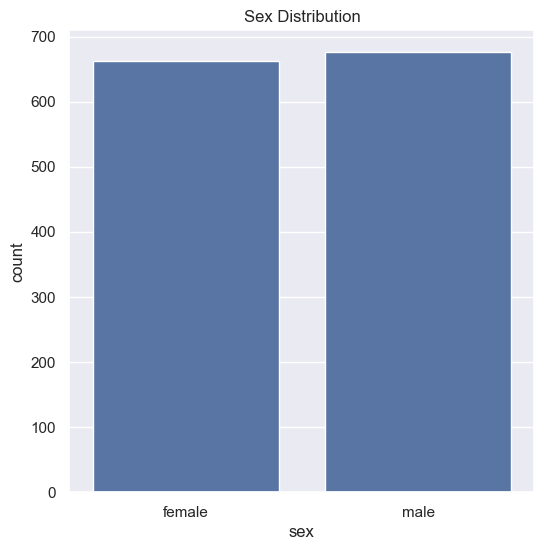

In [11]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [12]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

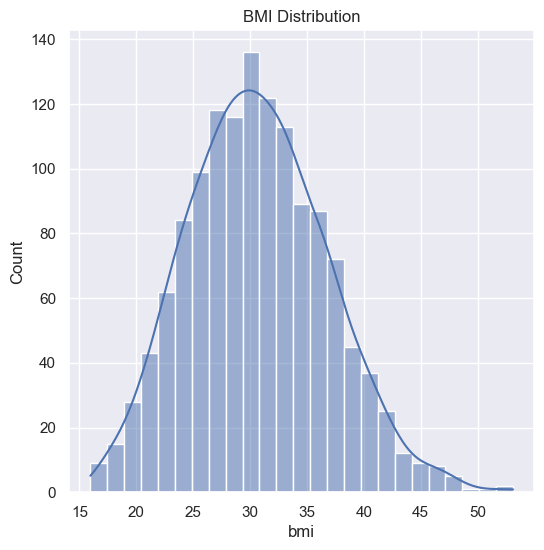

In [13]:
# bmi distribution  below distribution is called normal distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'], kde=True)  # kde=True adds a Kernel Density Estimate (KDE) curve
plt.title('BMI Distribution')
plt.show()


Normal BMI Range --> 18.5 to 24.9     less than this is underweight and more than this overweight so here more people are overweight

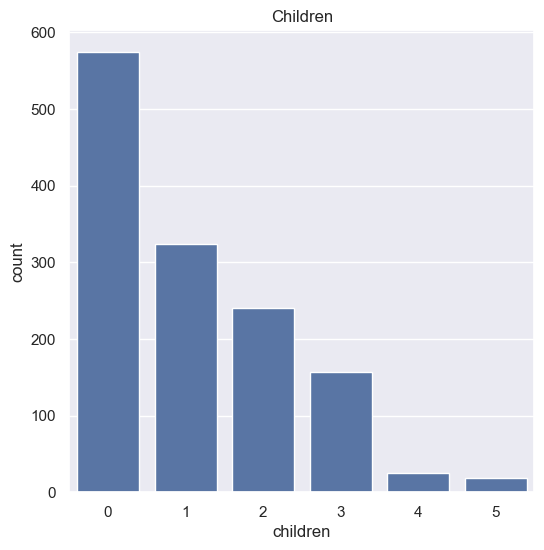

In [14]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [15]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

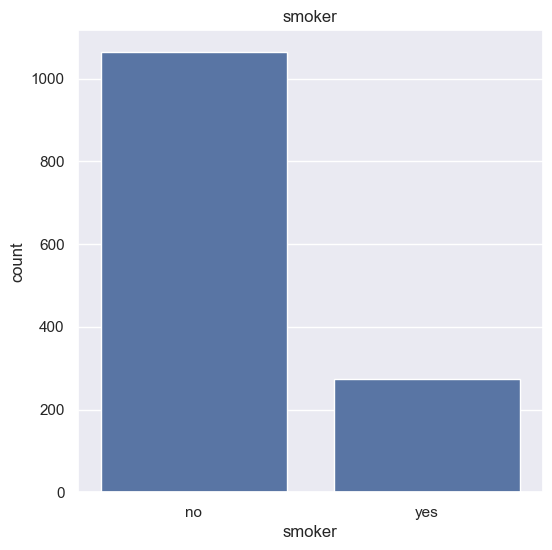

In [16]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [17]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

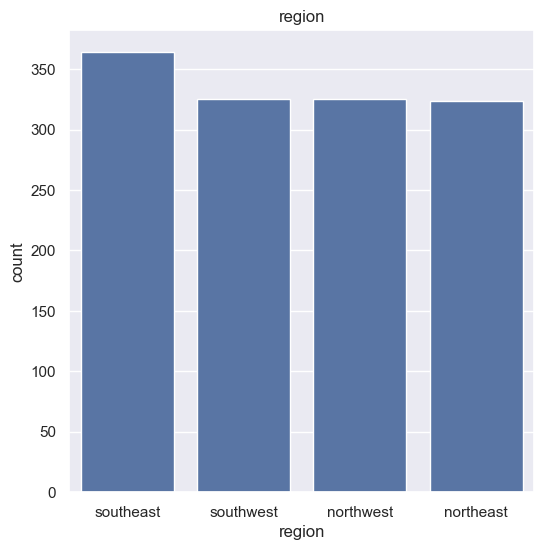

In [18]:
# region column              we use countplot when range of values are not very large we use distribution plot to see how range is distributed
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [19]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

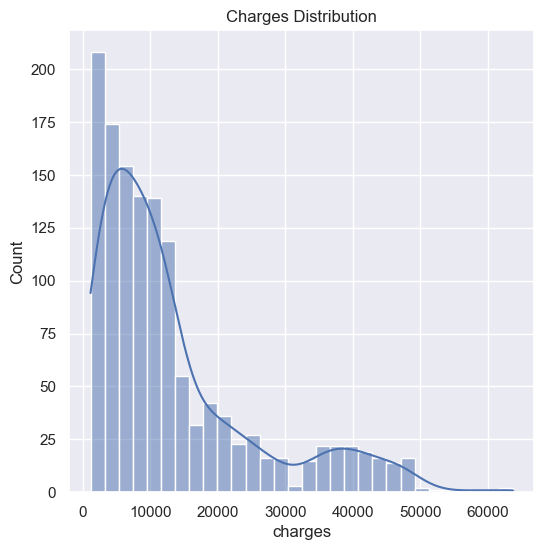

In [20]:


plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charges'], kde=True)  # kde=True adds a smooth density curve
plt.title('Charges Distribution')
plt.show()


Data Pre-Processing

Encoding the categorical features

In [22]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [23]:
insurance_dataset.head()


,age,sex,bmi,children,smoker,region,charges
0,31,1,25.74,0,1,0,3756.6216
1,46,1,33.44,1,1,0,8240.5896
2,19,1,27.90,0,0,1,16884.9240
3,18,0,33.77,1,1,0,1725.5523
4,28,0,33.00,3,1,0,4449.4620


Splitting the Features and Target

In [24]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [25]:
print(X)

      age  sex    bmi  children  smoker  region
0      31    1  25.74         0       1       0
1      46    1  33.44         1       1       0
2      19    1  27.90         0       0       1
3      18    0  33.77         1       1       0
4      28    0  33.00         3       1       0
...   ...  ...    ...       ...     ...     ...
1333   50    0  30.97         3       1       3
1334   18    1  31.92         0       1       2
1335   18    1  36.85         0       1       0
1336   21    1  25.80         0       1       1
1337   61    1  29.07         0       0       3

[1338 rows x 6 columns]


In [26]:
print(Y)

0        3756.6216
1        8240.5896
2       16884.9240
3        1725.5523
4        4449.4620
           ...    
1333    10600.5483
1334     2205.9808
1335     1629.8335
1336     2007.9450
1337    29141.3603
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Testing Data

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [28]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [29]:
# loading the Linear Regression model
regressor = LinearRegression()

In [30]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [31]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [32]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)  #comparing the target with trained prediction
print('R squared value : ', r2_train)  # as close to 1 better

R squared value :  0.7520590184159511


In [33]:
# prediction on test data in case of overfitting model overlearns on training and give high result on that but low on testing so both traing and testing should almost equal
test_data_prediction =regressor.predict(X_test)

In [34]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7426689819836736


Building a Predictive System

In [35]:
import numpy as np
import pandas as pd

# Input data (Age, Sex, BMI, Children, Smoker, Region)
input_data = (31, 1, 25.74, 0, 1, 0)  # Tuple

# Convert to NumPy array
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)  

# Convert to Pandas DataFrame with correct column names
input_df = pd.DataFrame(input_data_as_numpy_array, columns=X_train.columns)  

# Make prediction
prediction = regressor.predict(input_df)

print('Predicted Insurance Cost (USD):', prediction[0])


Predicted Insurance Cost (USD): 3786.63219293805


Future scope

In [36]:
# Define features (X) and target variable (y)
X = insurance_dataset.drop(columns=['charges'])  # Features (all except target)
y = insurance_dataset['charges']  # Target (charges)


In [38]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100)
}

# Train each model and compute R² score
for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    print(f"{name} R² Score:", r2_score(y_test, y_pred))

# Define input data (Age, Sex, BMI, Children, Smoker, Region)
input_data = (31, 1, 25.74, 0, 1, 0)  # Tuple

# Convert to DataFrame with correct feature names
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
input_df = pd.DataFrame(input_data_as_numpy_array, columns=X_train.columns)

print("\nPredicted Insurance Costs:")
for name, model in models.items():
    predicted_cost = model.predict(input_df)[0]
    print(f"{name}: USD {predicted_cost:.2f}")


Linear Regression R² Score: 0.7830215867059385
Decision Tree R² Score: 0.6959510362792649
Random Forest R² Score: 0.8660489506615411

Predicted Insurance Costs:
Linear Regression: USD 4016.99
Decision Tree: USD 3756.62
Random Forest: USD 3760.05


In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100)
}

# Train each model and compute R² score for training and testing data
for name, model in models.items():
    model.fit(X_train, y_train)  

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"{name} R² Score on Training Data: {r2_train:.4f}")
    print(f"{name} R² Score on Test Data:     {r2_test:.4f}\n")

# Define input data (Age, Sex, BMI, Children, Smoker, Region)
input_data = (31, 1, 25.74, 0, 1, 0)  # Tuple

# Convert to DataFrame with correct feature names
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
input_df = pd.DataFrame(input_data_as_numpy_array, columns=X_train.columns)

print("Predicted Insurance Costs:")
for name, model in models.items():
    predicted_cost = model.predict(input_df)[0]
    print(f"{name}: USD {predicted_cost:.2f}")


Linear Regression R² Score on Training Data: 0.7413
Linear Regression R² Score on Test Data:     0.7830

Decision Tree R² Score on Training Data: 0.9983
Decision Tree R² Score on Test Data:     0.7183

Random Forest R² Score on Training Data: 0.9747
Random Forest R² Score on Test Data:     0.8651

Predicted Insurance Costs:
Linear Regression: USD 4016.99
Decision Tree: USD 3756.62
Random Forest: USD 3769.22


In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100)
}

# Dictionaries to store scores and predictions
r2_train_scores = {}
r2_test_scores = {}
predicted_costs = {}

# Train models and compute scores
for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2_train_scores[name] = r2_score(y_train, y_train_pred)
    r2_test_scores[name] = r2_score(y_test, y_test_pred)

    # Prepare input for prediction
    input_data = (31, 1, 25.74, 0, 1, 0)  # Tuple (Age, Sex, BMI, Children, Smoker, Region)
    input_array = np.asarray(input_data).reshape(1, -1)
    input_df = pd.DataFrame(input_array, columns=X_train.columns)
    
    predicted_costs[name] = model.predict(input_df)[0]

# Print training R² scores
print("R² Scores on Training Data:")
for name, score in r2_train_scores.items():
    print(f"{name}: {score:.4f}")
print()

# Print testing R² scores
print("R² Scores on Test Data:")
for name, score in r2_test_scores.items():
    print(f"{name}: {score:.4f}")
print()

# Print predicted insurance costs
print("Predicted Insurance Costs:")
for name, cost in predicted_costs.items():
    print(f"{name}: USD {cost:.2f}")


R² Scores on Training Data:
Linear Regression: 0.7413
Decision Tree: 0.9983
Random Forest: 0.9756

R² Scores on Test Data:
Linear Regression: 0.7830
Decision Tree: 0.7141
Random Forest: 0.8650

Predicted Insurance Costs:
Linear Regression: USD 4016.99
Decision Tree: USD 3756.62
Random Forest: USD 3726.93


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load and preprocess
data = pd.read_csv('insurance.csv')
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data = pd.get_dummies(data, columns=['region'], drop_first=True)

X = data.drop(['charges'], axis=1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Save models
joblib.dump(lin_reg, 'linear_regression.pkl')
joblib.dump(dt_reg, 'decision_tree.pkl')
joblib.dump(rf_reg, 'random_forest.pkl')


['random_forest.pkl']